In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/Guess Who Data.csv")

Mounted at /content/drive


Depth of the decision tree: 7

Feature importances:
             feature  importance
0         Large Lips    0.117647
9         White Hair    0.117647
1        Facial Hair    0.088235
4         Brown Eyes    0.088235
5               Male    0.088235
8           Red Hair    0.088235
12    Thick Eyebrows    0.088235
2              Beard    0.058824
3          Accessory    0.058824
7         Black Hair    0.058824
13     Chin Marking?    0.058824
6         Large Nose    0.029412
10       Blonde Hair    0.029412
11        Brown Hair    0.029412
14  Curly/Wavy Hair?    0.000000

Total number of nodes: 69
Number of leaf nodes (terminal nodes): 35

Average depth of the leaves: 5.31

All characters are uniquely reachable in the decision tree.


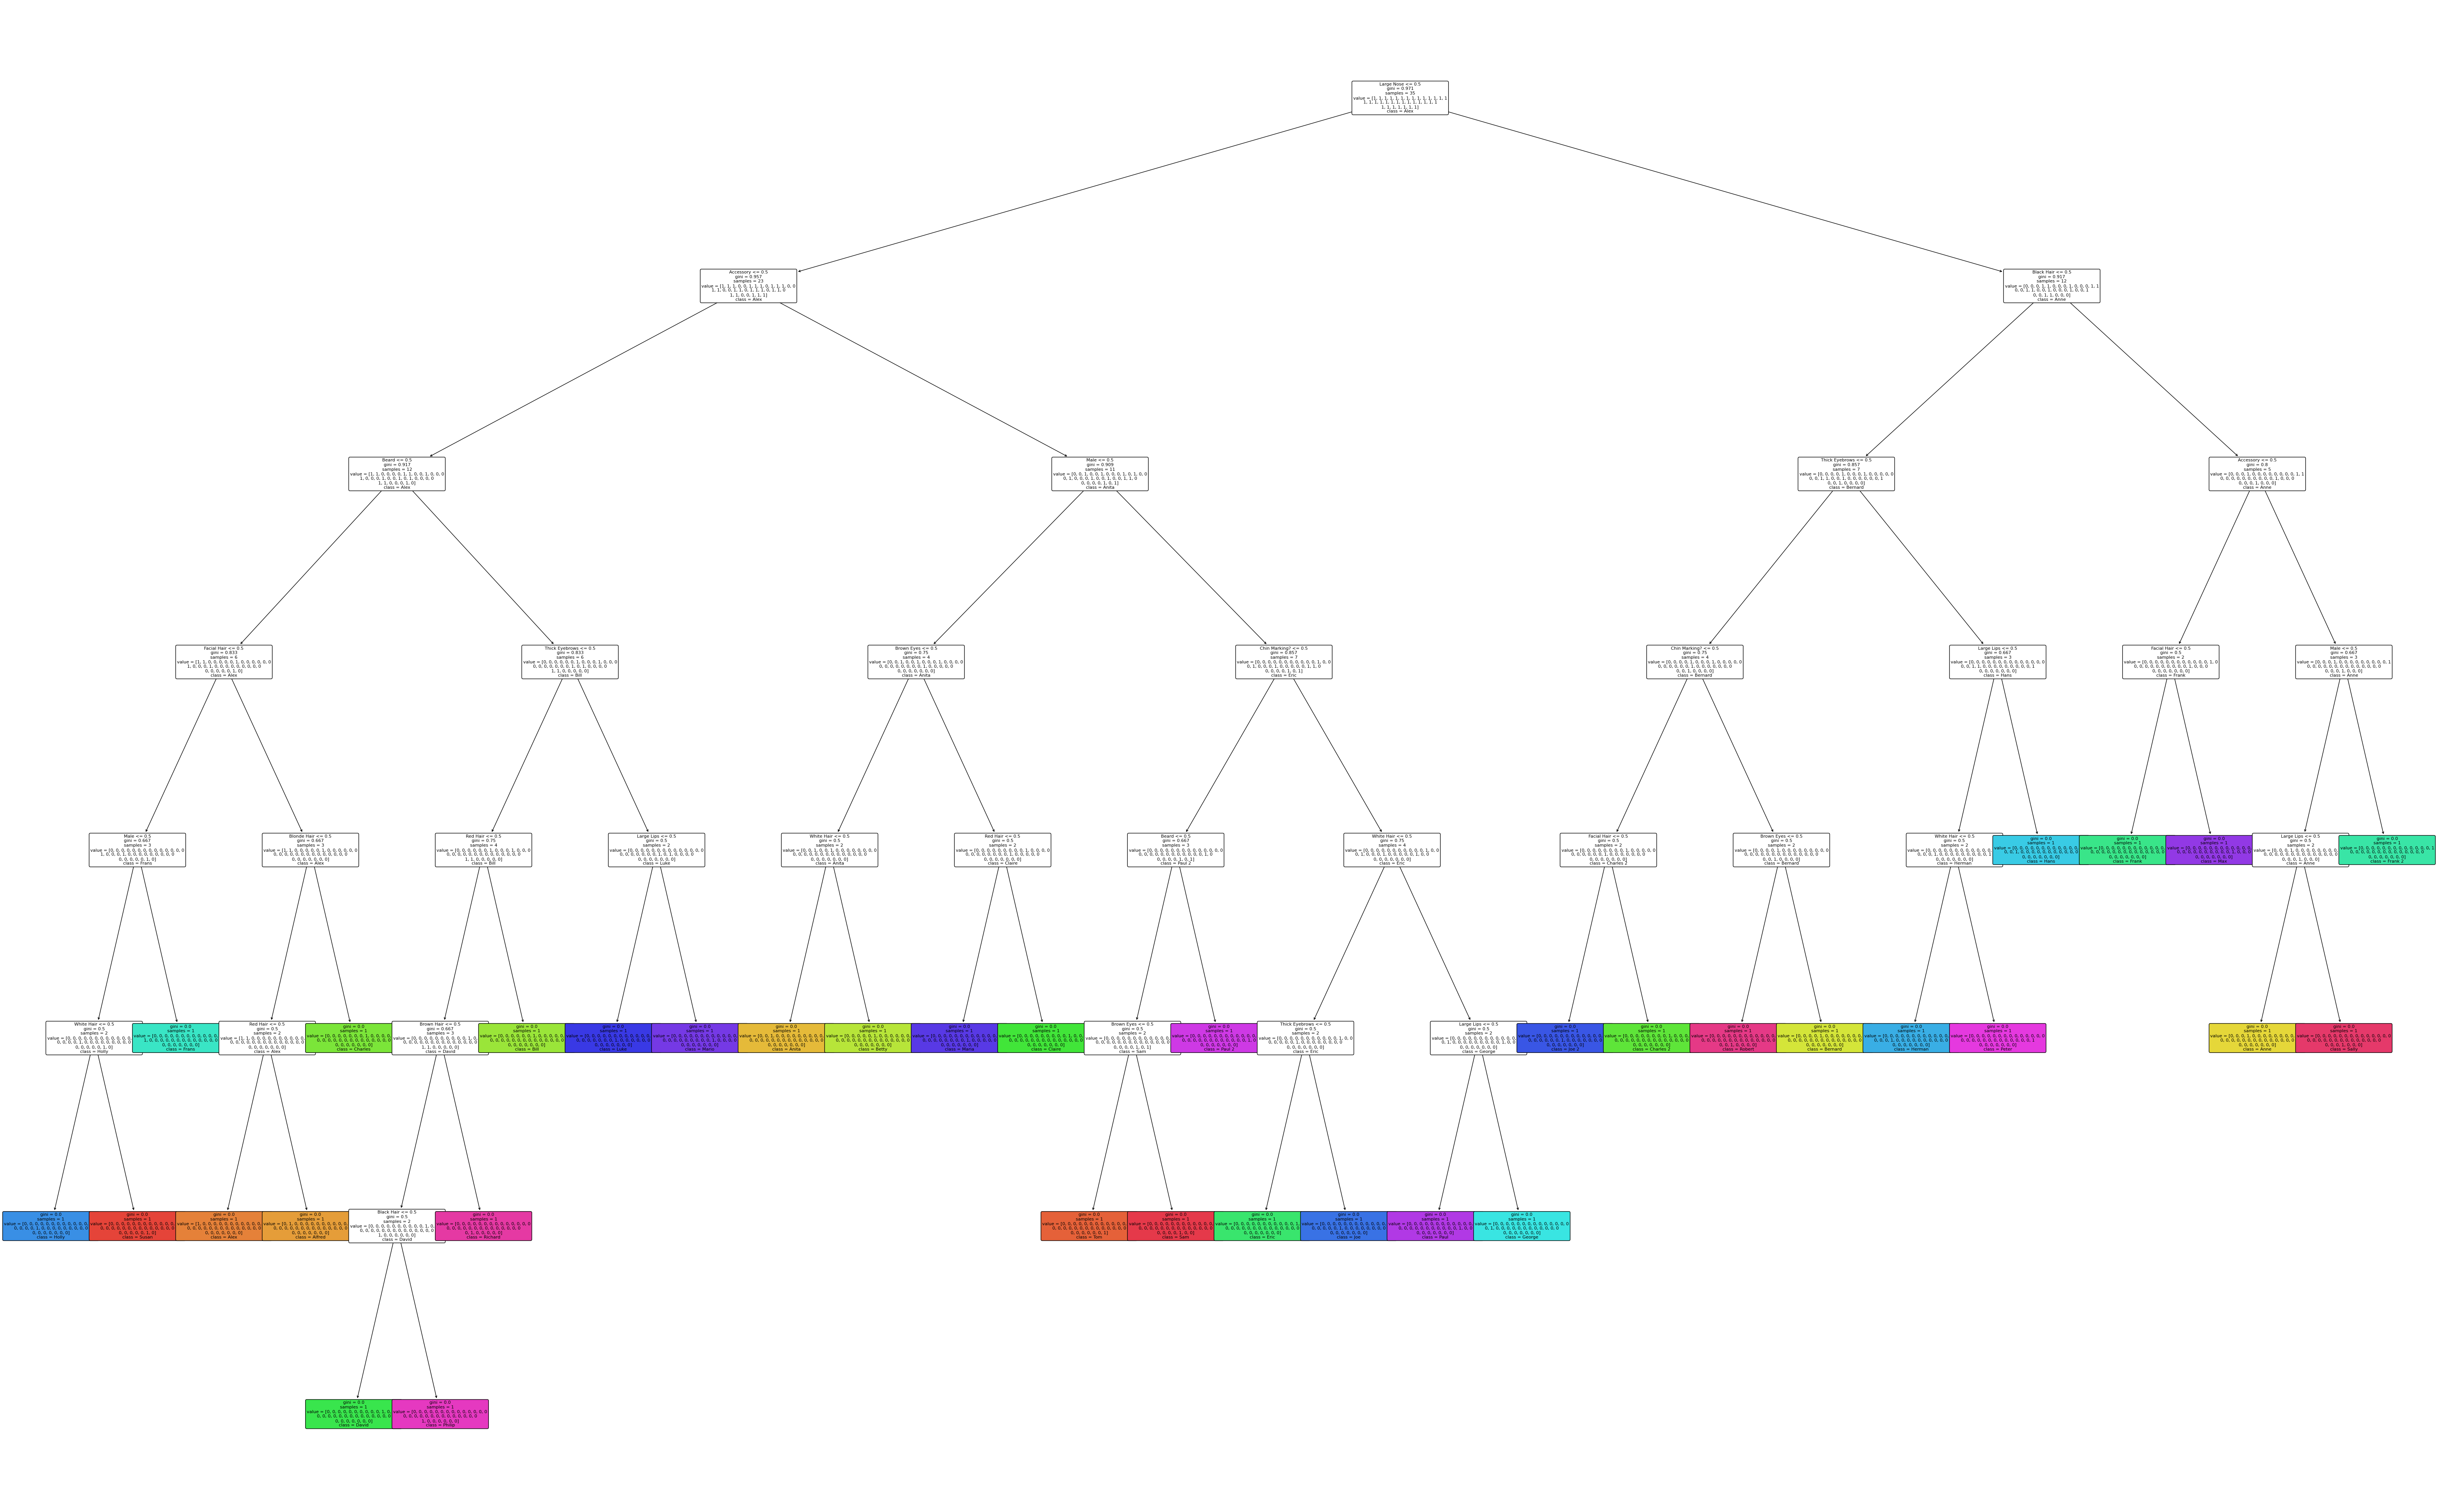

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Separate features and target
X = data.drop(['Name'], axis=1)
y = data['Name']

# Create and fit the decision tree
dt = DecisionTreeClassifier(random_state=166467, max_depth=None)
dt.fit(X, y)

# Get the depth of the tree for optimization purposes
depth = dt.get_depth()

# Make the plot bigger to be able to read names
plt.figure(figsize=(80, 50))

# Plot the decision tree
class_names = list(y.unique())
plot_tree(dt, feature_names=X.columns.tolist(), class_names=class_names, filled=True, rounded=True, fontsize=8)

# Print the depth of the tree
print(f"Depth of the decision tree: {depth}")

# Print the feature importances
importances = pd.DataFrame({'feature': X.columns, 'importance': dt.feature_importances_})
importances = importances.sort_values('importance', ascending=False)
print("\nFeature importances:")
print(importances)

# Print information about the tree to ensure minimal nodes
n_nodes = dt.tree_.node_count
n_leaves = dt.tree_.n_leaves
print(f"\nTotal number of nodes: {n_nodes}")
print(f"Number of leaf nodes (terminal nodes): {n_leaves}")

# Calculate the average depth of the leaves
def calculate_average_leaf_depth(tree):
    # Get the depth of each leaf node
    node_depth = np.zeros(shape=tree.tree_.node_count)
    stack = [(0, 0)]  # (node_id, depth)
    while stack:
        node_id, depth = stack.pop()
        node_depth[node_id] = depth
        left_child = tree.tree_.children_left[node_id]
        right_child = tree.tree_.children_right[node_id]
        if left_child != right_child:  # Not a leaf node
            stack.append((left_child, depth + 1))
            stack.append((right_child, depth + 1))

    # Average depth of the leaves
    leaf_depths = node_depth[tree.tree_.children_left == tree.tree_.children_right]
    average_leaf_depth = np.mean(leaf_depths)
    return average_leaf_depth

avg_leaf_depth = calculate_average_leaf_depth(dt)
print(f"\nAverage depth of the leaves: {avg_leaf_depth:.2f}")

# Make sure that all characters are reachable
leaf_labels = dt.apply(X)
unique_leaf_labels = np.unique(leaf_labels)
if len(unique_leaf_labels) == len(y):
    print("\nAll characters are uniquely reachable in the decision tree.")
else:
    print("\nWarning: Not all characters have a unique path in the decision tree.")
    unreachable = set(range(len(y))) - set(unique_leaf_labels)
    print(f"Characters not uniquely reachable: {[y.iloc[i] for i in unreachable]}")




In [5]:
def colab2pdf():

   ENABLE=True # @param {type:"boolean"}

   if ENABLE:

       import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings

       locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

       NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))

       TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)

       NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=30)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]

       warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)

       with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)

       if not pathlib.Path("/usr/local/bin/quarto").exists():

           !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet

       with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)

       !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet

       google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))

colab2pdf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>